# 

# Boston House Prices 
This notebook demonstrates how to use the Boston House Prices dataset to build a Regression predictive modeling machine learning problem from end-to-end in Python

| Column   | Description                                                                                   |
|----------|----------------------------------------------------------------------------------------------|
| CRIM     | Per capita crime rate by town                                                                |
| ZN       | Proportion of residential land zoned for lots over 25,000 sq.ft.                             |
| INDUS    | Proportion of non-retail business acres per town                                             |
| CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)                        |
| NOX      | Nitric oxides concentration (parts per 10 million)                                           |
| RM       | Average number of rooms per dwelling                                                         |
| AGE      | Proportion of owner-occupied units built prior to 1940                                       |
| DIS      | Weighted distances to five Boston employment centers                                         |
| RAD      | Index of accessibility to radial highways                                                    |
| TAX      | Full-value property-tax rate per $10,000                                                     |
| PTRATIO  | Pupil-teacher ratio by town                                                                  |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town                               |
| LSTAT    | % lower status of the population                                                             |
| MEDV     | Median value of owner-occupied homes in $1000s                                               |

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv("housing.csv", header=None, delimiter=r'\s+')

# Adding column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


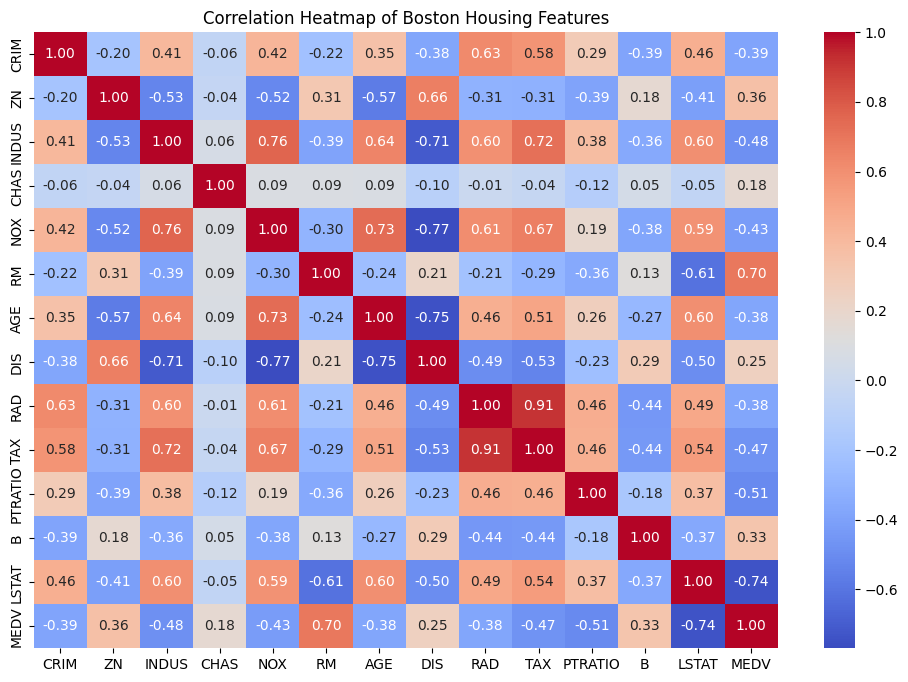

In [16]:
# Plot a heatmap of the correlation matrix for the dataframe
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Boston Housing Features")
plt.show()

df[['RM']] returns a DataFrame (2D) instead of df['RM'] returns a Series (1D). Most scikit-learn functions expect the features (X) to be a 2D array (even if you have only one feature),so [['RM']] is the correct and recommended way for machine learning tasks.

In [3]:
from sklearn.model_selection import train_test_split

# Select feature and target
# df[['RM']] returns a DataFrame (2D)
x=df[['RM']]
y=df['MEDV']

# Split the data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [4]:
X_train = np.array(x_train).ravel()
Y_train = np.array(y_train)

# m is the number of training examples
m = X_train.shape[0]

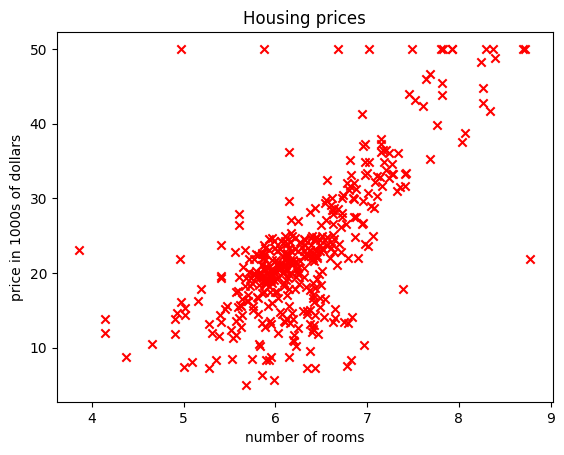

In [5]:
# plot the data points
plt.scatter(X_train, Y_train, marker='x', c='r')
# Set the title
plt.title("Housing prices")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("number of rooms")
plt.show()

## Model function
the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. 


In [6]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model 
    Args:
        x(ndarray (m,)): Data, m examples
        w,b (scalar)   : model parameters
    Returns
        y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

Now let's call the `compute_model_output` function and plot the output..

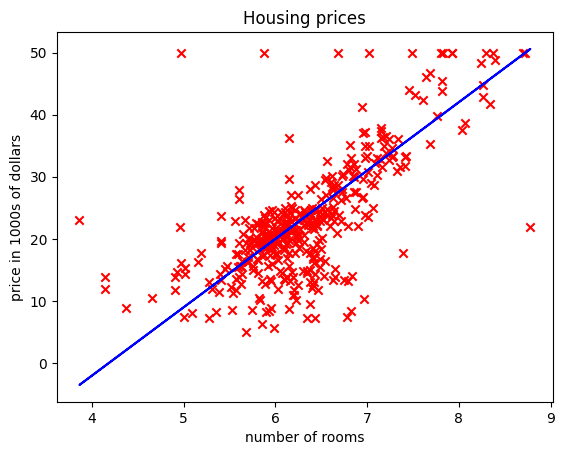

In [7]:
w=11
b=-46
tmp_f_wb = compute_model_output(X_train, w, b,)
plt.plot(X_train, tmp_f_wb, c='b', label='our prediction')

# plot the data points
plt.scatter(X_train, Y_train, marker='x', c='r', label= 'Actual Values' )

# Set the title 
plt.title("Housing prices")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("number of rooms")
plt.show()

c:\Users\Beshoy Raafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


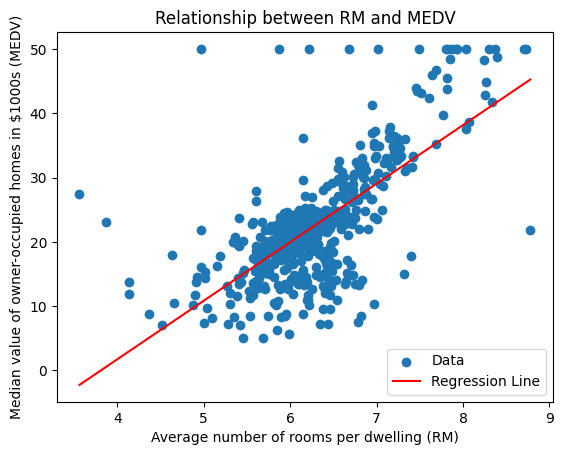

Slope (w): 9.102108981180308
Intercept (b): -34.670620776438554


In [8]:
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression()
model.fit(x, y)

# Predict values for the regression line
x_range = np.linspace(x['RM'].min(), x['RM'].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plot scatter and regression line
plt.scatter(x['RM'], y, label='Data')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('Relationship between RM and MEDV')
plt.legend()
plt.show() 

print("Slope (w):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Mean Squared Error (MSE): 45.870372249807104
Root Mean Squared Error (RMSE): 6.772766956702933
R^2 Score: 0.3744987606936233


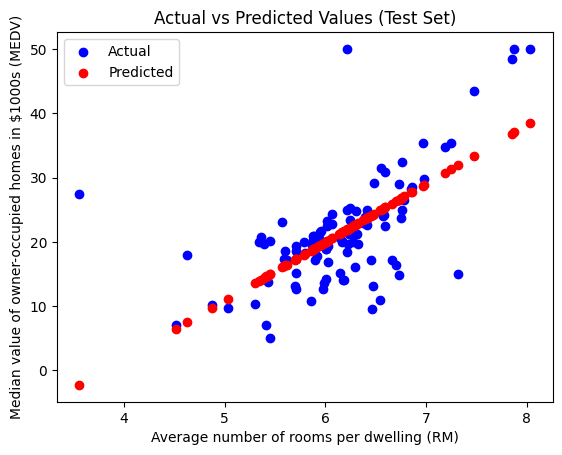

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_test_pred = model.predict(x_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Compare predicted vs actual values visually
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_test_pred, color='red', label='Predicted')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()

Mean Squared Error (MSE): 32.52590896663358
Root Mean Squared Error (RMSE): 5.703149039489813
R^2 Score: 0.556467598357429


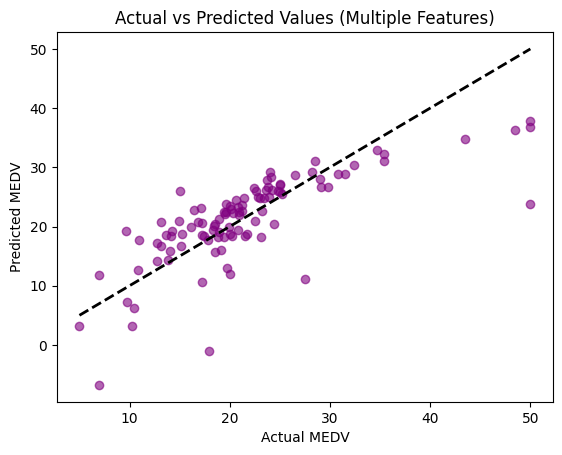

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select multiple features for X (for example: 'RM', 'LSTAT', 'CRIM', 'AGE')
features = ['RM', 'LSTAT', 'CRIM', 'AGE']
X = df[features]
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = multi_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Compare predicted vs actual values visually
plt.scatter(y_test, y_test_pred, color='purple', alpha=0.6)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values (Multiple Features)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Mean Squared Error (MSE): 14.882099892981051
Root Mean Squared Error (RMSE): 3.857732480743196
R^2 Score: 0.7970635189998903


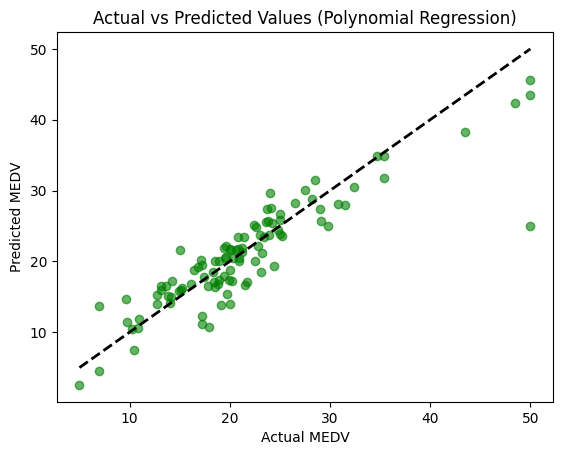

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Choose your features (can be one or more)
features = ['RM', 'LSTAT', 'CRIM', 'AGE']
X = df[features]
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree=2 for quadratic, can increase degree for more complexity)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_test_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Compare predicted vs actual values visually
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Mean Squared Error (MSE): 13.34638483022515
Root Mean Squared Error (RMSE): 3.6532704293858607
R^2 Score: 0.8180049595825819


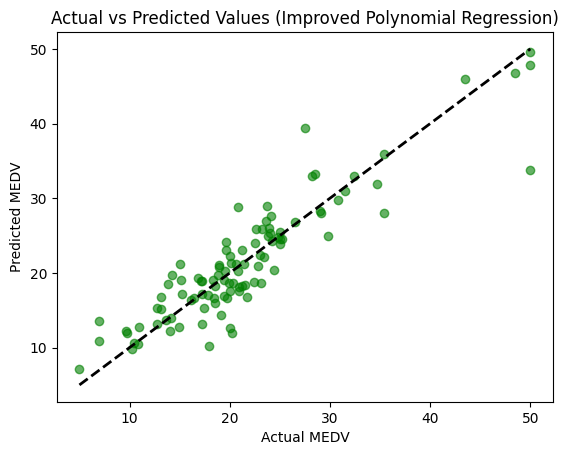

In [12]:
# PolynomialFeatures all features
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use more features
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = df[features]
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial features (try degree=2 or 3)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_test_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Visual comparison
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values (Improved Polynomial Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Train Mean Squared Error (MSE): 6.582752839165099
Train Root Mean Squared Error (RMSE): 2.565687595785017
Train R^2 Score: 0.9242259132401145
Test Mean Squared Error (MSE): 13.34638483022515
Test Root Mean Squared Error (RMSE): 3.6532704293858607
Test R^2 Score: 0.8180049595825819


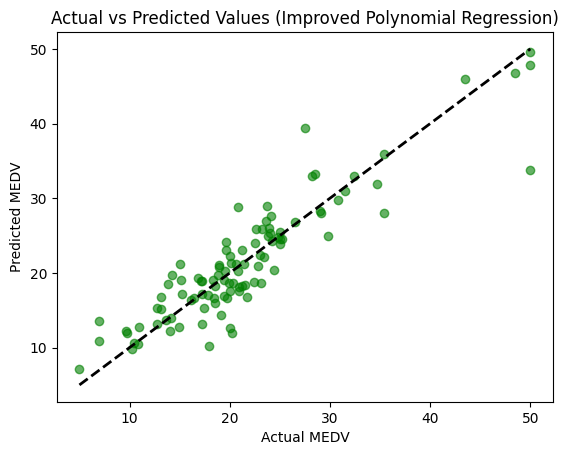

In [13]:
# After fitting the model
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error (MSE):", mse_train)
print("Train Root Mean Squared Error (RMSE):", rmse_train)
print("Train R^2 Score:", r2_train)
print("Test Mean Squared Error (MSE):", mse_test)
print("Test Root Mean Squared Error (RMSE):", rmse_test)
print("Test R^2 Score:", r2_test)

# Visual comparison (test set)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values (Improved Polynomial Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Mean Squared Error (MSE): 14.740199091914869
Root Mean Squared Error (RMSE): 3.839296692353284
R^2 Score: 0.7989985180542273


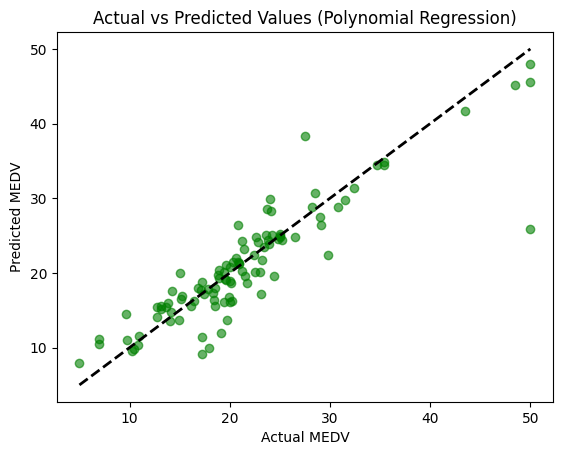

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Choose your features (can be one or more)
features = ['RM', 'LSTAT', 'PTRATIO', 'TAX']
X = df[features]
y = df['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree=2 for quadratic, can increase degree for more complexity)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_test_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Compare predicted vs actual values visually
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()